In [1]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
import scipy
%reload_ext autoreload
%autoreload 2
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

sns.set_context('talk')

c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


# Analysis load

In [2]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

# Load pre-saved data

In [2]:
#files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = pygor.filehandling.find_files_in(".h5", fr"C:\Users\{user}\OneDrive\h5s", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-14_0_0_SWN_200_Colours.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_0_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_2_ColourSWN_200_1.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_4_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_MP_0_3_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-8_MP_0_0_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-7-18_Colo

In [3]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = False)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

[14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours,
 07-11-2023:STRF:2023-11-7_0_0_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_0_2_ColourSWN_200_1,
 07-11-2023:STRF:2023-11-7_0_4_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_MP_0_3_ColourSWN_200_,
 08-11-2023:STRF:2023-11-8_MP_0_0_ColourSWN_200_,
 13-06-2023:STRF:2023-6-13_0_0_ColourSWN_200_0,
 13-06-2023:STRF:2023-6-13_0_1_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_'0_2_ColourSWN_200_0',
 14-06-2023:STRF:2023-6-14_0_0_ColorSWN_200_0,
 14-06-2023:STRF:2023-6-14_SMP_0_2_ColourSWN_200_0,
 18-07-2023:STRF:2023-7-18_'0_1_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_ColourSWN_200_0_4,
 31-07-2023:STRF:2023-7-31_'0_1_ColourSWN_200_0',
 01-08-2023:STRF:2023-8-1_'0_0_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_1H']

In [4]:
exp = pygor.load.Experiment(list_of_objs)
exp.detach_data([2,3])
exp.recording_id

Detaching data: ['2023-11-7_0_2_ColourSWN_200_1', '2023-11-7_0_4_ColourSWN_200']


,id,name,date,num_rois,type,path
0,0,2023-11-14_0_0_SWN_200_Colours,14-11-2023,11,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
1,1,2023-11-7_0_0_ColourSWN_200,07-11-2023,70,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
2,4,2023-11-7_MP_0_3_ColourSWN_200_,07-11-2023,52,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-7_MP_0_3_C...
3,5,2023-11-8_MP_0_0_ColourSWN_200_,08-11-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-8_MP_0_0_C...
4,6,2023-6-13_0_0_ColourSWN_200_0,13-06-2023,59,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_0_Colo...
5,7,2023-6-13_0_1_ColourSWN_200_0,13-06-2023,19,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_1_Colo...
6,8,2023-6-14_'0_2_ColourSWN_200_0',14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_'0_2_Col...
7,9,2023-6-14_0_0_ColorSWN_200_0,14-06-2023,62,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_0_0_Colo...
8,10,2023-6-14_SMP_0_2_ColourSWN_200_0,14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
9,11,2023-7-18_'0_1_ColourSWN_200_0',18-07-2023,13,STRF,C:\Users\Simen\OneDrive\h5s\2023-7-18_'0_1_Col...


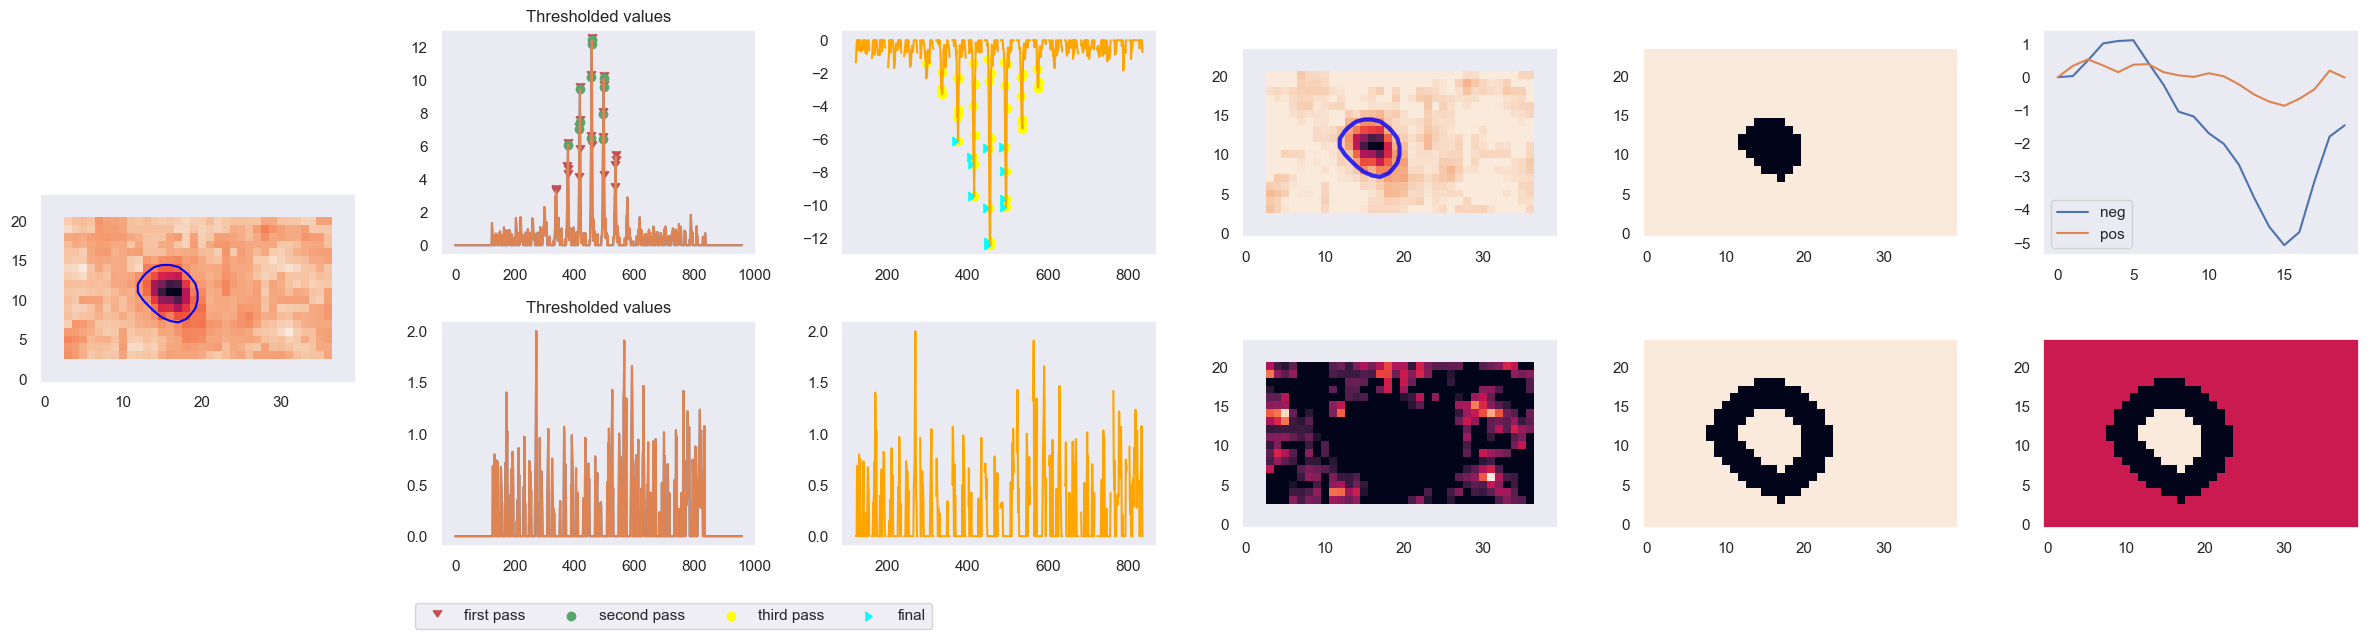

In [9]:
sns.set_theme(style="dark")
list_of_objs[0].demo_contouring(12)

## Pickle and save them (if changes needed)

# Analysis by various groupings

In [ ]:
import pygor.strf.plot
import pygor.strf.analyse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")


In [ ]:
cs_df = pygor.strf.analyse.cs_df(exp)
cs_df["Areas"] = 2 * np.sqrt(cs_df["Areas"].to_numpy()/np.pi)
cs_df

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
0,22.891863,Centre,R,-1,-7.185487,0,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
1,0.000000,Surround,R,-1,1.081363,0,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
2,16.141897,Centre,R,-1,-4.101274,1,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
3,0.000000,Surround,R,-1,-0.809979,1,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
4,0.000000,Centre,R,0,0.000000,2,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
...,...,...,...,...,...,...,...
3211,0.000000,Surround,UV,0,0.000000,97,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3212,0.000000,Centre,UV,0,0.000000,98,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3213,0.000000,Surround,UV,0,0.000000,98,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3214,0.000000,Centre,UV,0,0.000000,99,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...


In [ ]:
np.unique(cs_df["pol"])

array([-1,  0,  1,  2])

In [ ]:
cs_df.query("`C/S` == 'Surround' & pol == [-1, 1] & `Areas` < 1")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
1,0.0,Surround,R,-1,1.081363,0,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
3,0.0,Surround,R,-1,0.582782,1,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
9,0.0,Surround,R,-1,0.809498,4,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
17,0.0,Surround,R,-1,1.177727,8,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
19,0.0,Surround,R,-1,0.247375,9,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
...,...,...,...,...,...,...,...
3833,0.0,Surround,UV,1,-0.615799,76,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3835,0.0,Surround,UV,1,-0.778353,77,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3837,0.0,Surround,UV,1,-1.095703,78,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3843,0.0,Surround,UV,-1,0.423304,81,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...


In [ ]:
cs_df.query("Amplitude < 0")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
0,22.891863,Centre,R,-1,-7.185487,0,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
2,16.141897,Centre,R,-1,-4.101274,1,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
8,13.504629,Centre,R,-1,-3.947351,4,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
16,15.883154,Centre,R,-1,-5.220082,8,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
18,13.022835,Centre,R,-1,-4.887479,9,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
...,...,...,...,...,...,...,...
3833,0.000000,Surround,UV,1,-0.615799,76,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3835,0.000000,Surround,UV,1,-0.778353,77,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3837,0.000000,Surround,UV,1,-1.095703,78,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3842,14.793391,Centre,UV,-1,-5.051107,81,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...


In [ ]:
abs_cs_df = cs_df
abs_cs_df["Amplitude"] = np.abs(cs_df["Amplitude"])

In [ ]:
for i in cs_df.keys():
    print(i, len(cs_df[i]))

Areas 3880
C/S 3880
Colour 3880
pol 3880
Amplitude 3880
ROI 3880
Filename 3880


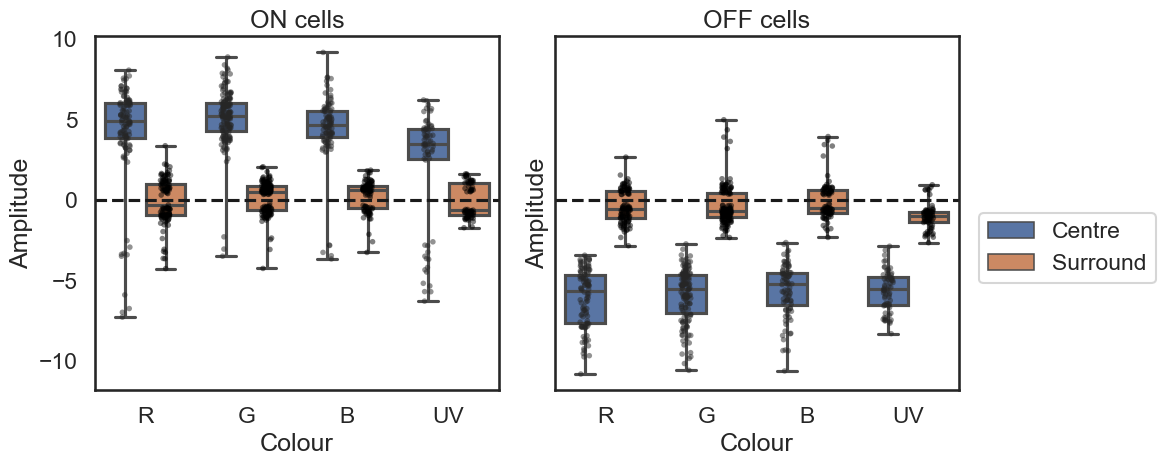

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12, 5), sharey=True)
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude",  whis=10, hue = "C/S", ax = ax[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", whis=10, hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[0], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)
ax.flat[0].axhline(0, ls = "--", c = "k")
ax.flat[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
ax[0].set_title("ON cells")
ax[1].set_title("OFF cells")
# plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

In [ ]:
import pygor.strf.clustering.run_clustering

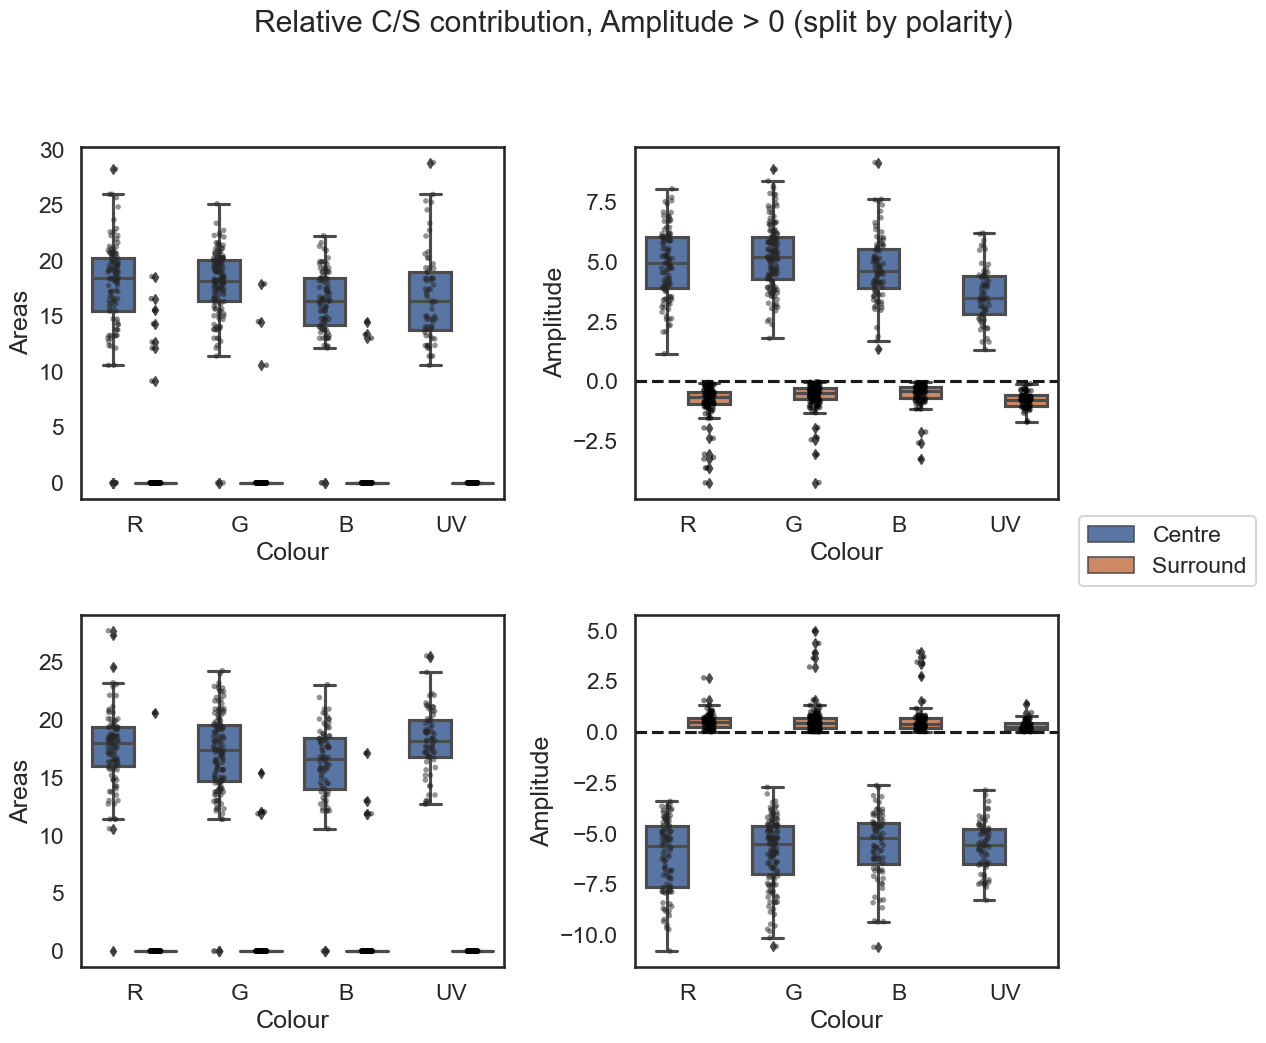

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

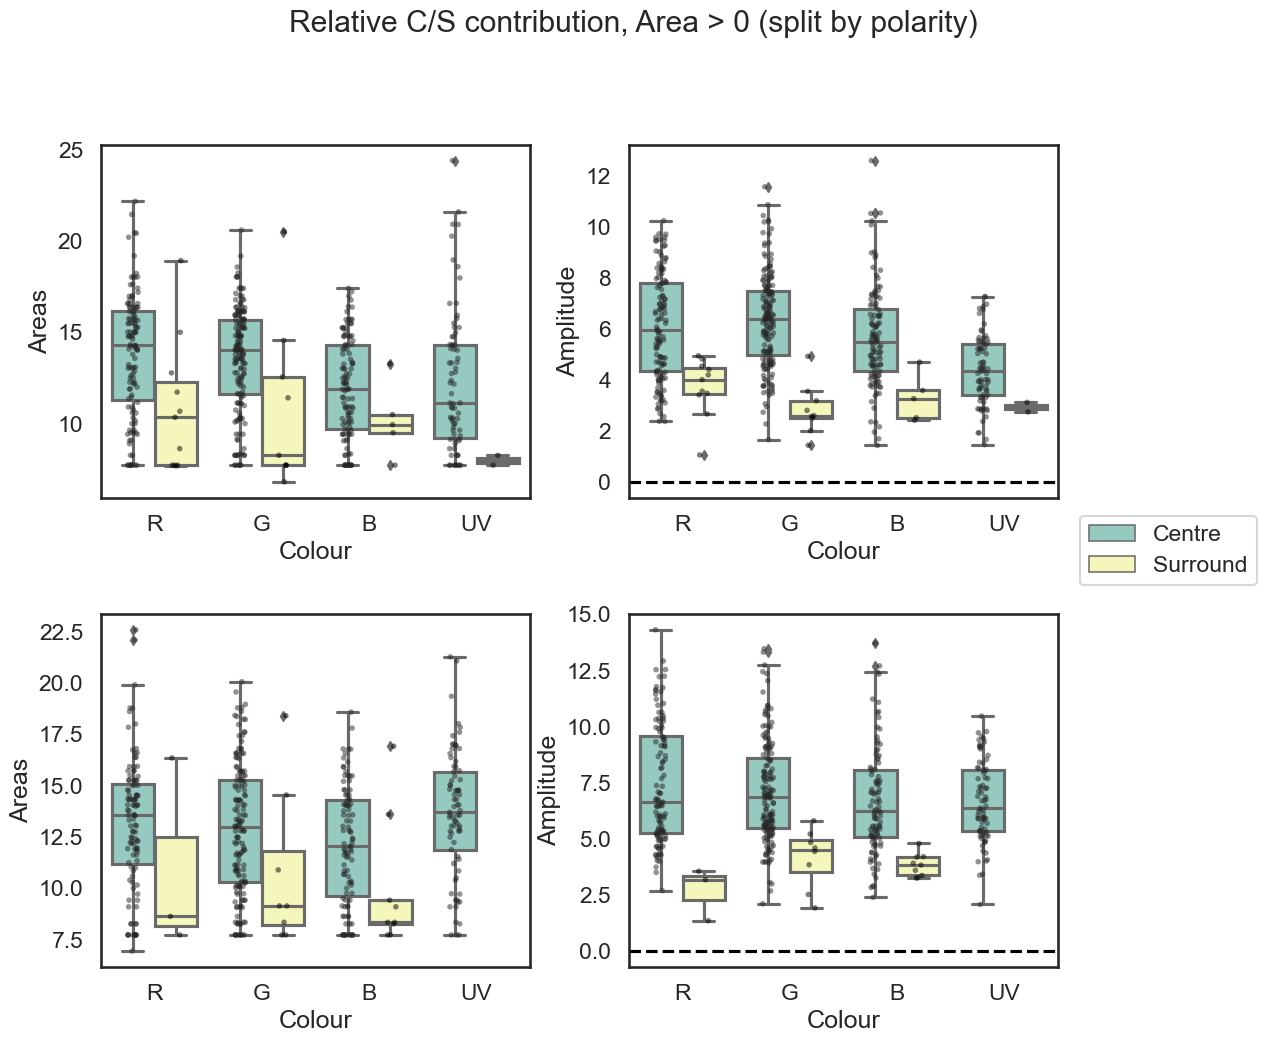

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Area > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

<AxesSubplot: xlabel='C/S', ylabel='Amplitude'>

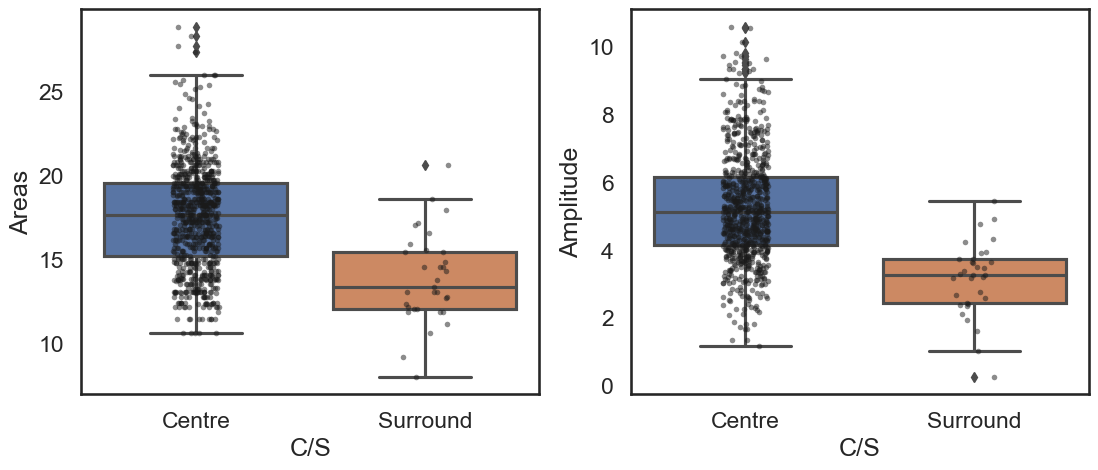

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Areas", x = "C/S", ax=ax[0])
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Amplitude", x = "C/S", ax=ax[1])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Areas", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[0])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Amplitude", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[1])

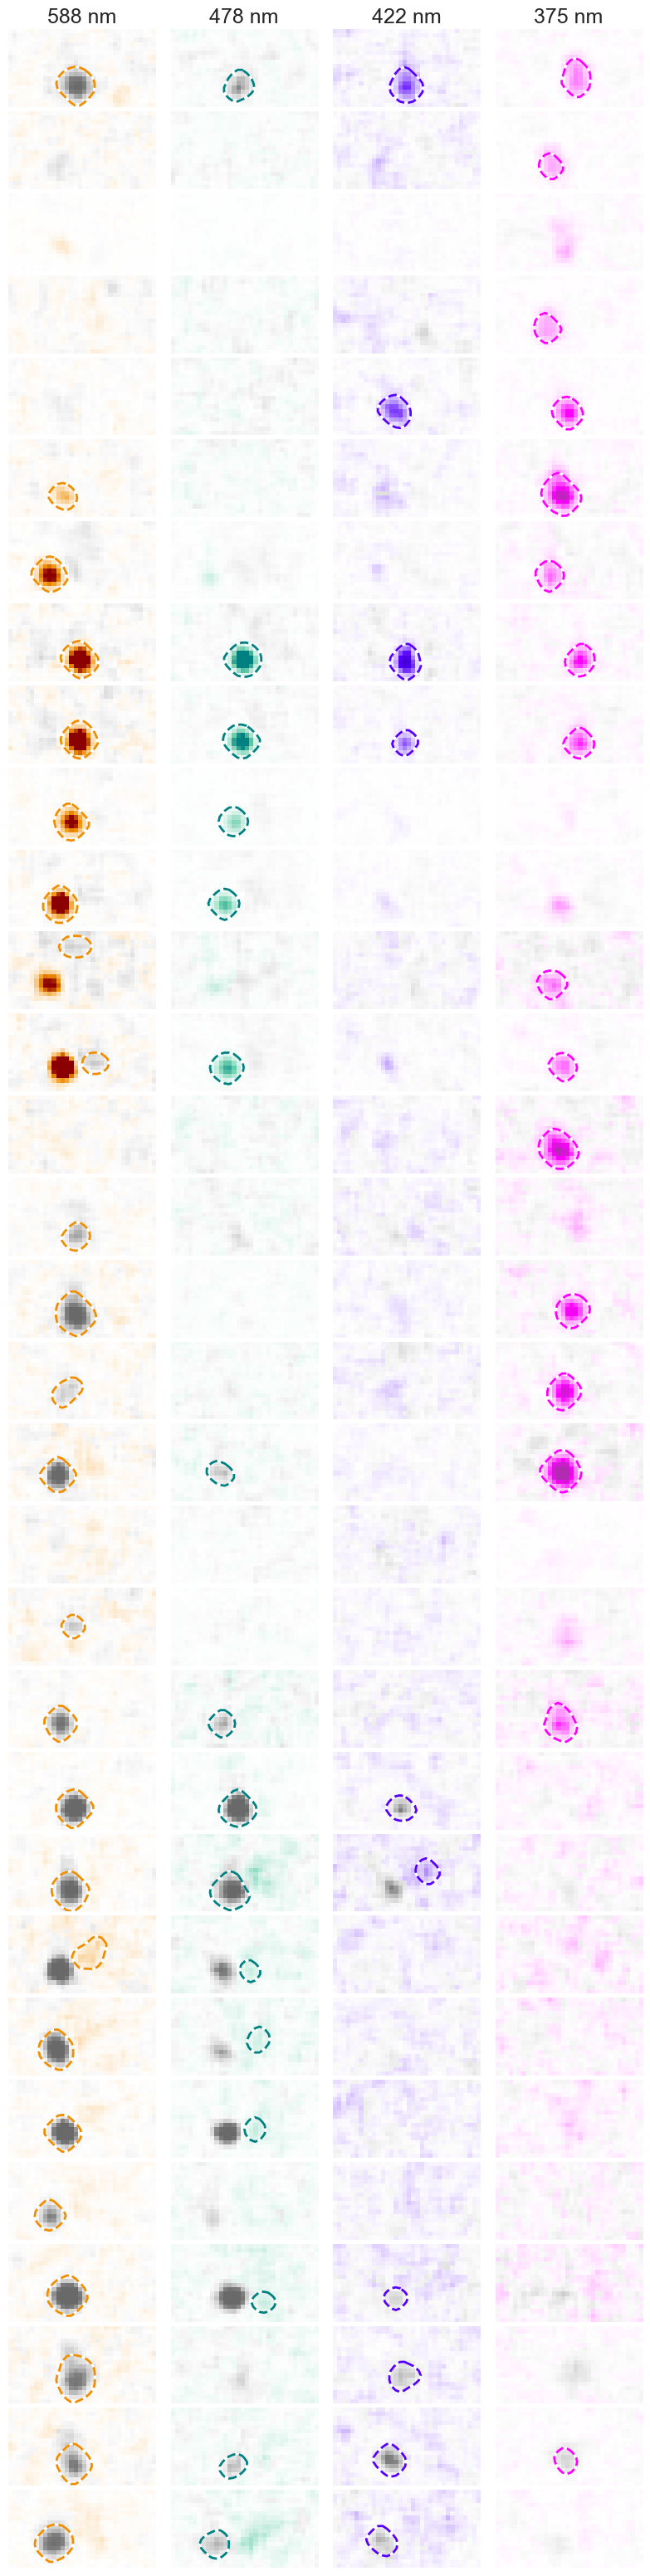

In [ ]:
list_of_objs[6].plot_chromatic_overview()

Text(0.5, 1.05, 'Relative C/S contribution in dual-polarity cells')

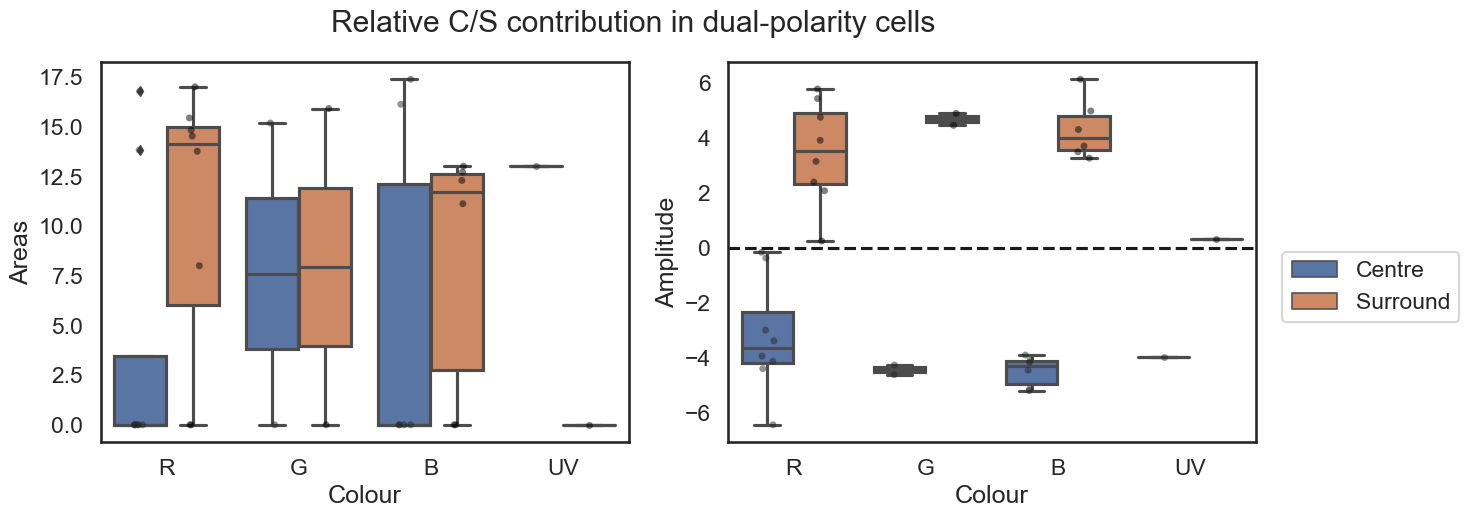

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Areas", hue = "C/S", whis = 2, ax = ax[0])
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax[0],     palette="dark:black", size = 5, alpha = .5)
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1], palette="dark:black", size = 5, alpha = .5)
ax[0].get_legend().remove()
ax[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2],bbox_to_anchor=(1.05, .5), loc=2, borderaxespad=0.)
plt.suptitle("Relative C/S contribution in dual-polarity cells", y = 1.05)
# plt.legend(title = "C/S")

In [ ]:
opsins = np.load(r"C:\Users\Simen\Downloads\AllOpsins.npy")

C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage

Text(0, 0.5, 'Rel. absorbance')

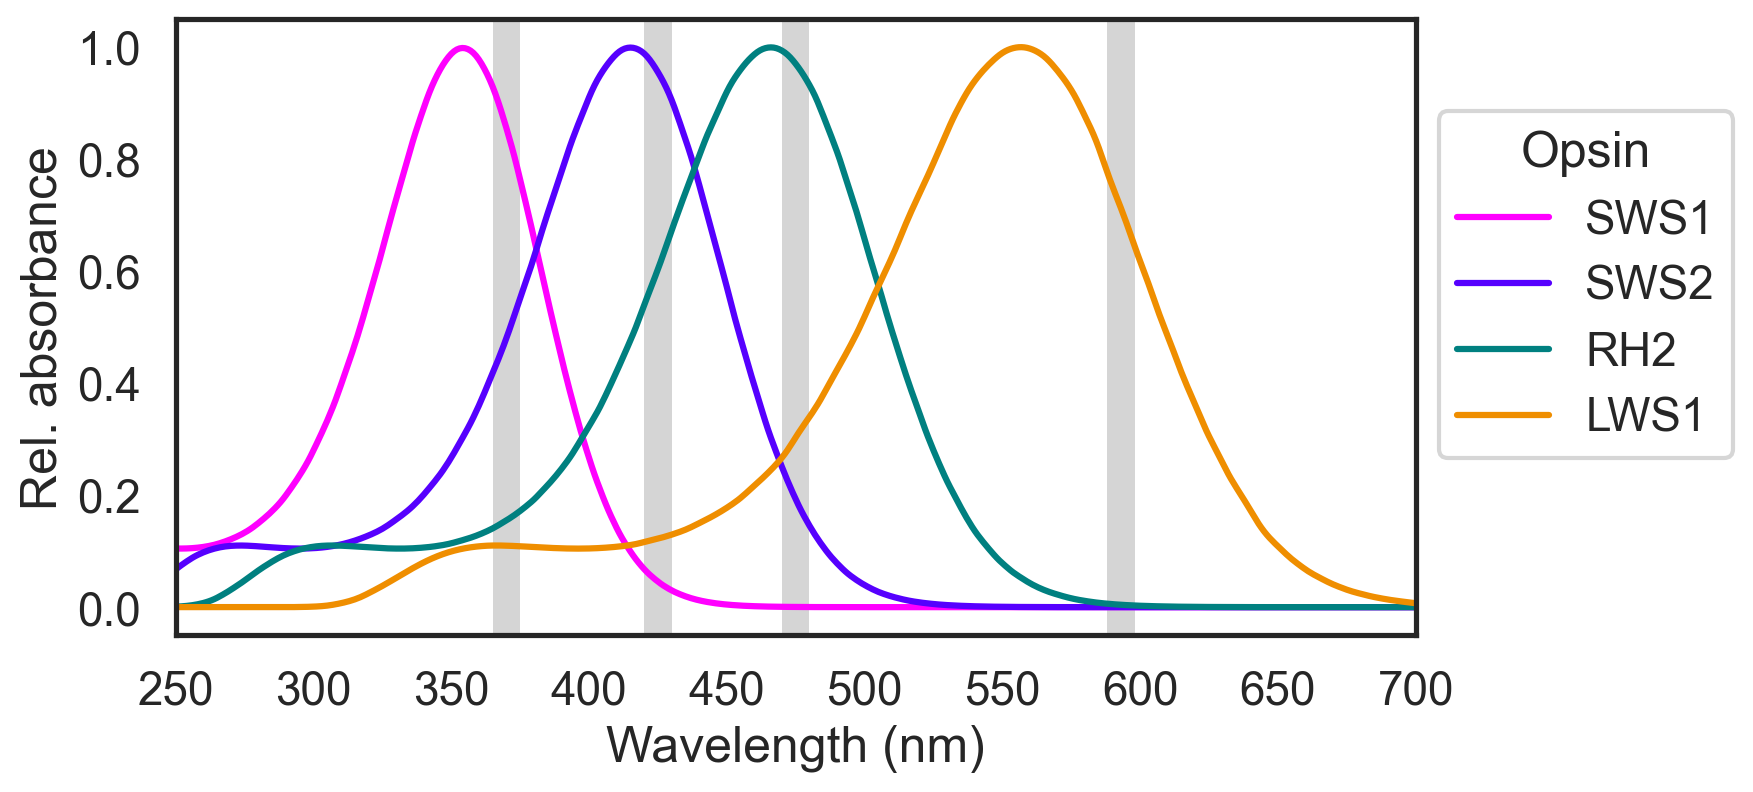

In [ ]:
zeb_ops = [355, 416, 467, 558]
led_wvs = [365, 420, 470, 588]
ops_nam = ["SWS1", "SWS2", "RH2", "LWS1"]
colours = pygor.plotting.fish_palette
reversed(colours)
fig, ax = plt.subplots(1, 1, figsize = (8, 4), dpi = 200)
for n, i in enumerate(zeb_ops):
    line = opsins[i]
    ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)   
    plt.plot(ysmoothed, c =colours[n], label = f"{ops_nam[n]}")
    plt.axvspan(led_wvs[n], led_wvs[n]+10, color = "grey", alpha = .33, lw = 0)
plt.xlim(250, 700)
plt.legend(title = "Opsin", bbox_to_anchor=(1, .25), loc=0)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Rel. absorbance")

In [ ]:
# centre_amps = cs_df.query("`C/S` == 'Centre'")["Amplitude"].to_numpy()
# surround_amps = cs_df.query("`C/S` == 'Surround'")["Amplitude"].to_numpy()
# amps = np.stack([centre_amps, surround_amps])
# plt.plot(amps, c = "k", alpha = 0.1)
# sns.lineplot(cs_df, x = "C/S", y = "Areas")

In [ ]:
cs_df.query("pol == 2")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
146,46.895,Centre,R,2,3.411975,29,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
147,154.847,Surround,R,2,2.968026,29,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
432,127.288,Centre,R,2,5.812566,172,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
433,46.895,Surround,R,2,4.762595,172,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
440,37.878,Centre,R,2,6.193679,176,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
...,...,...,...,...,...,...,...
2849,210.684,Surround,B,2,8.974141,84,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
2856,138.630,Centre,B,2,5.009117,88,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
2857,154.536,Surround,B,2,6.092381,88,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
3306,46.895,Centre,UV,2,4.277153,57,C:\Users\Simen\OneDrive\h5s\2023-7-31_'0_1_Col...


In [ ]:
cent, surr = list_of_objs[obj].get_contours_area()[0]

In [ ]:
cent, surr

(array([193.931]), array([0]))

In [ ]:
pols

array([-1,  2, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1,  0,  0, -1,  2,  0,  0, -1,  2,  0,  0, -1,  2,
        2,  0, -1, -1, -1,  0, -1, -1,  0,  1, -1,  0,  0,  1,  0,  0,  0,
        0, -1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  0,  1,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,
        1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,
        1,  1,  0,  0,  1,  1,  0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,
        1, -1, -1,  1,  1])

In [ ]:
area_tots

array([[400.984,  53.689,  46.895,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  46.895,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  81.051,   0.   ,   0.   ,   0.   , 311.379, 100.947,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,  53.689,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   , 271.996,  94.914,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
      

In [ ]:
list_of_objs[0]

array([[ 0.00000000e+00,  2.86784608e-01,  8.46452582e-01,
         1.44483687e+00,  1.07966351e+00,  9.88380040e-01,
         9.89814180e-01,  1.58019192e+00,  1.80402187e+00,
         1.67216613e+00,  1.60038553e+00,  1.48762984e+00,
         1.07273007e+00,  4.34871756e-01, -1.72575522e+00,
        -4.81031995e+00, -8.17340947e+00, -9.41979705e+00,
        -6.58229281e+00, -3.43138573e+00],
       [ 0.00000000e+00,  7.75564193e-02,  2.40625912e-01,
         4.88735961e-01,  2.72248357e-01,  2.04308378e-01,
        -2.44524209e-01,  3.12685119e-01,  4.94129941e-01,
         1.52013346e+00,  1.80754270e+00,  1.73403002e+00,
         1.52818036e+00,  1.26308299e-01, -1.23791601e+00,
        -3.61663636e+00, -5.00131649e+00, -4.97197480e+00,
        -3.67190437e+00, -1.78368353e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [238]:
exp.recording[0].get_polarities()

array([-1, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1, -1,  0,
        0,  1,  0,  0,  1,  1, -1,  0,  1,  1])

## Plot population stats roy-by-roi

In [233]:
roi_df = pygor.strf.analyse.roi_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
C:\Users\Simen\Git_repos\pygor

In [ ]:
roi_df.query("contour_area_total > 0")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,R,n,NaN,200,...,-0.359201,-0.100752,-17.139338,6.086507,17,14,17,1.412217,1.053281,1.412217
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,G,n,NaN,200,...,-0.380754,0.042105,-10.829629,3.090279,16,11,16,1.277630,1.910247,1.277630
4,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,R,n,NaN,200,...,-0.928148,-0.436090,-33.162453,5.193668,16,12,16,0.879593,0.818308,0.879593
7,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,UV,n,NaN,200,...,0.156635,0.526316,0.162812,4.053417,8,17,17,3.193250,2.091699,2.091699
8,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,2,NaN,True,R,n,NaN,200,...,-0.905392,-0.500752,-37.177267,6.066096,15,8,15,0.891282,0.914600,0.891282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,76.0,True,R,n,NaN,200,...,0.416457,0.676692,-5.299362,11.015269,11,17,17,0.570698,1.712345,1.712345
1917,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,30.0,True,G,n,NaN,200,...,0.022875,0.831579,-2.519778,0.657939,3,16,16,1.474329,1.938580,1.938580
1918,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,33.0,True,B,n,NaN,200,...,0.407295,0.708271,-2.396810,10.912470,8,15,15,1.408428,1.875875,1.875875
1921,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,20,93.0,True,G,n,NaN,200,...,-0.937195,0.909774,-33.841774,-2.768600,15,2,15,0.915597,1.236513,0.915597


In [ ]:
roi_df.columns

Index(['date', 'path', 'filename', 'roi', 'ipl_depths', 'multicolour',
       'colour', 'simultaneous', 'combo', 'size', 'shapeZ', 'shapeY', 'shapeX',
       'XYratio', 'visang_size', 'frequency', 'noise', 'time_pval',
       'space_pval', 'neg_contour_bool', 'pos_contour_bool',
       'neg_contour_count', 'pos_contour_count', 'total_contour_count',
       'neg_contour_area_total', 'pos_contour_area_total',
       'contour_area_total', 'contour_complexity', 'neg_extrema',
       'pos_extrema', 'polarity', 'neg_biphasic_index', 'pos_biphasic_index',
       'dom_biphasic_index', 'pols_corr', 'neg_auc', 'pos_auc', 'neg_peaktime',
       'pos_peaktime', 'dom_peaktime', 'neg_centroids', 'pos_centroids',
       'dom_centroids'],
      dtype='object')

### Assess how well contouring has worked
If the majority have 0 or 1 contour, we are good to go

<AxesSubplot: xlabel='total_contour_count', ylabel='Count'>

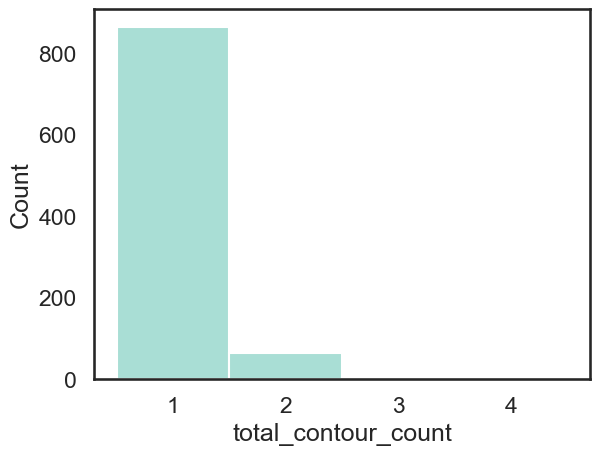

In [ ]:
sns.histplot(roi_df.query("contour_area_total > 0"), x = "total_contour_count", discrete=True)

In [ ]:
neg = roi_df["neg_contour_area_largest"].to_numpy()
pos = roi_df["pos_contour_area_largest"].to_numpy()

<AxesSubplot: xlabel='total_contour_area_largest', ylabel='dom_centroids'>

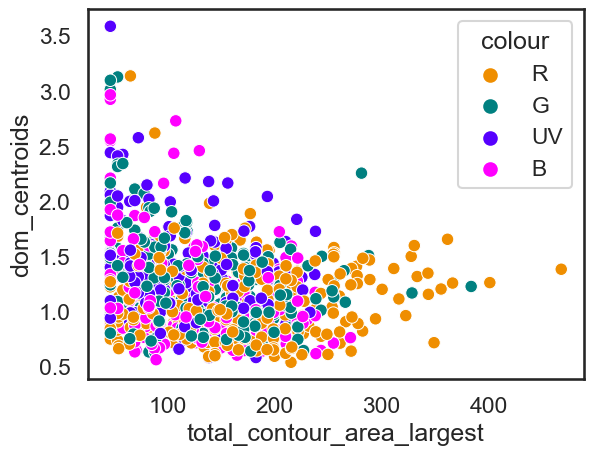

In [ ]:
sns.scatterplot(data = roi_df.query("total_contour_area_largest > 0"), x = "total_contour_area_largest", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette)

In [ ]:
roi_df.query("polarity == 1")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids


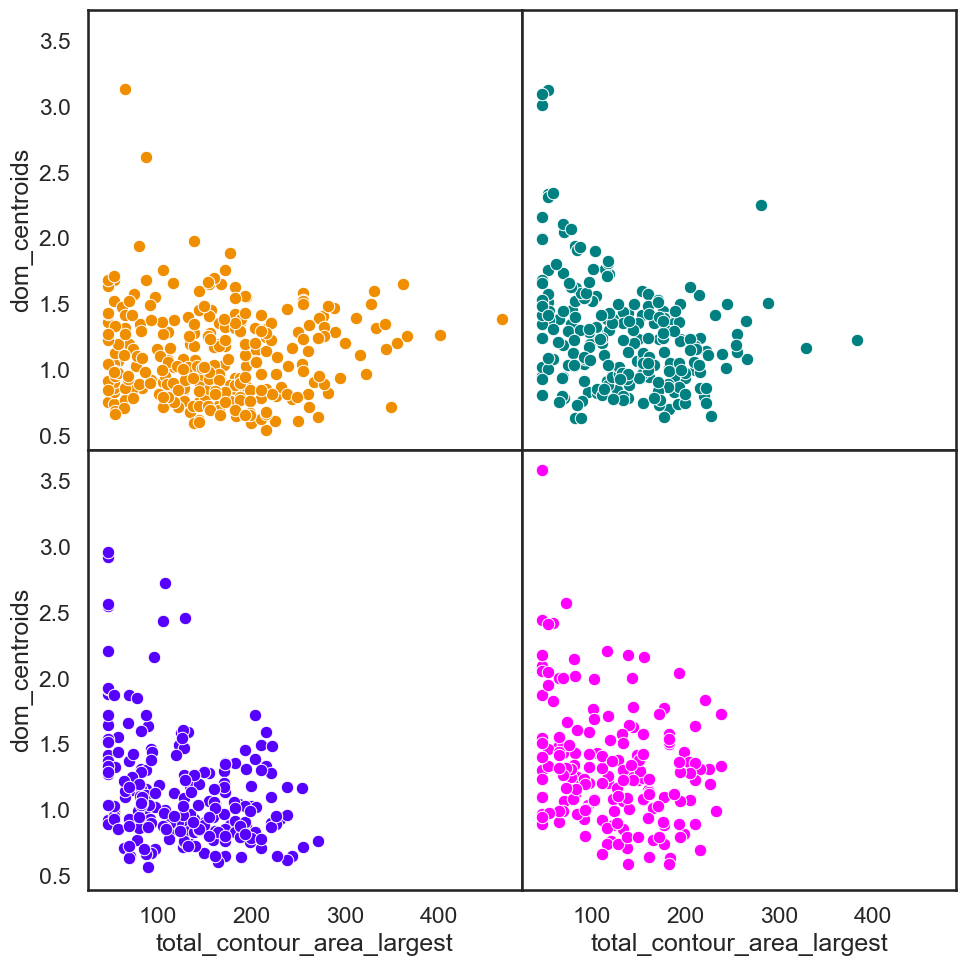

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "total_contour_area_largest", y = "dom_centroids", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
plt.tight_layout()


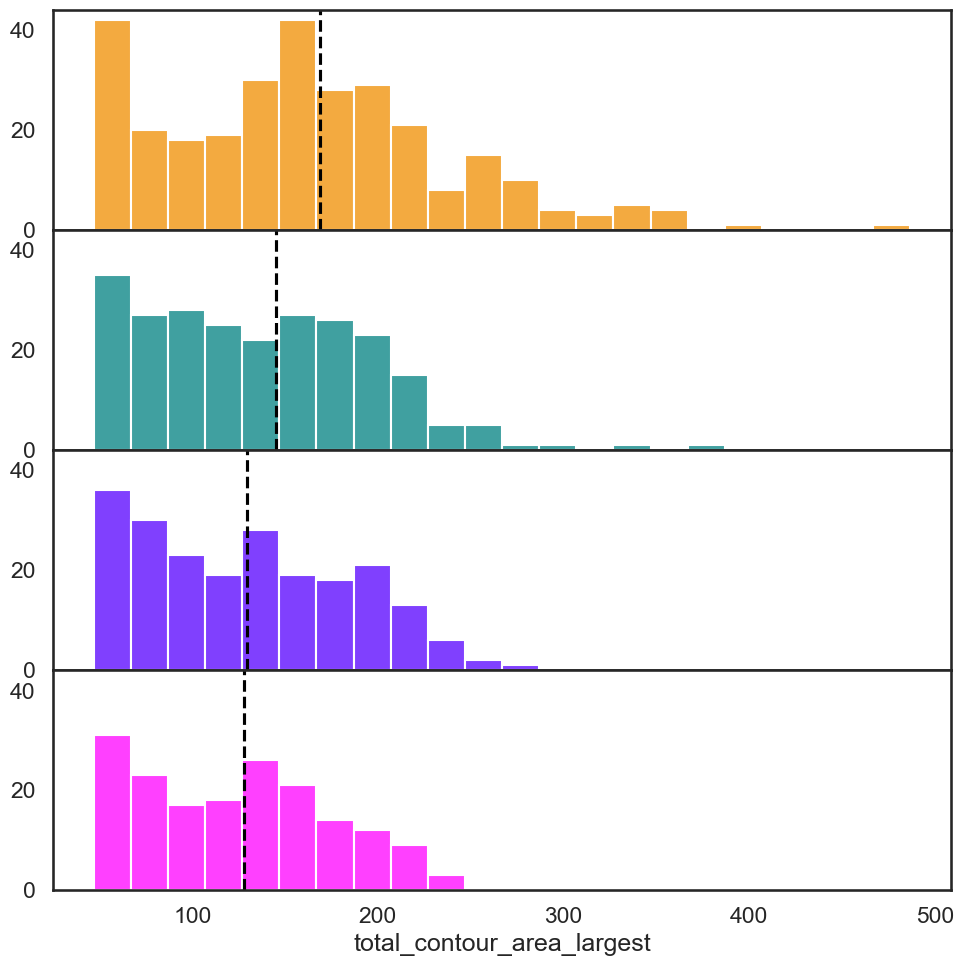

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars", binwidth=20)
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.average(non_zeros.query(f"colour == '{c}'")["contour_area_total"]), c = "k", ls = "--")
plt.tight_layout()


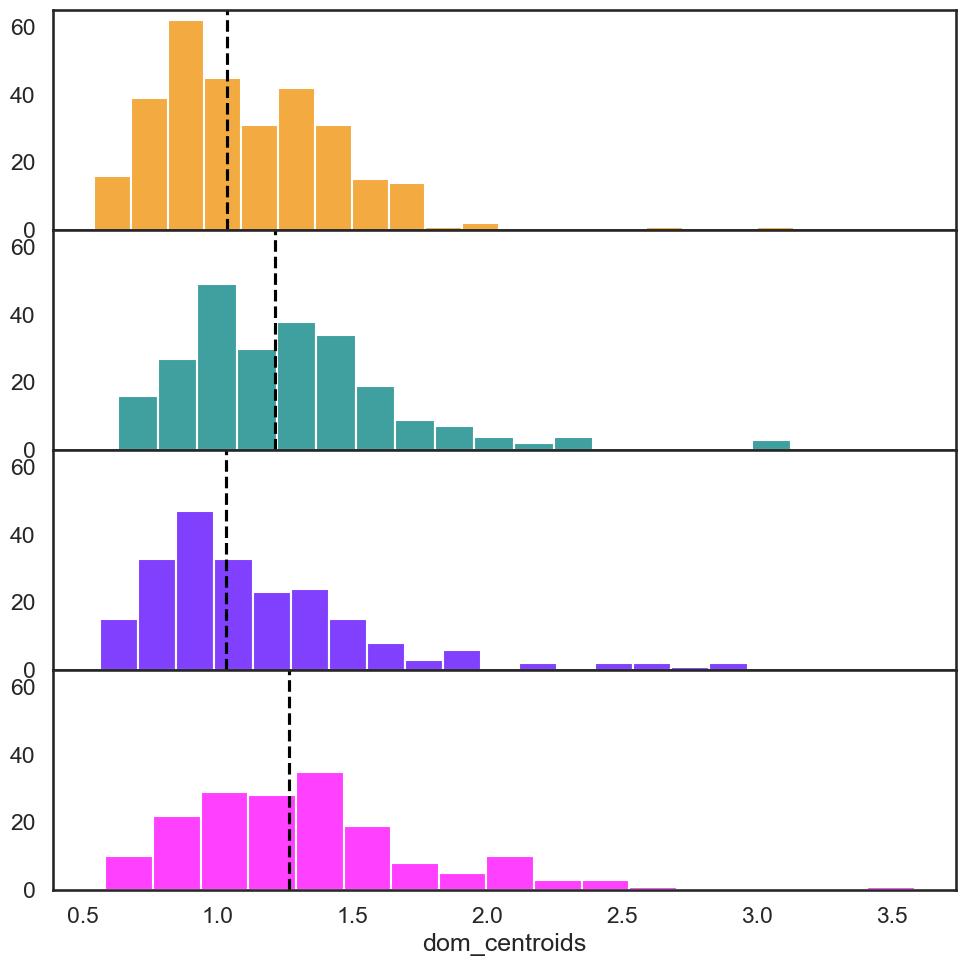

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
stat = "dom_centroids"
non_zeros = roi_df.query(f"{stat} > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars")
sns.histplot(data = non_zeros.query("colour == 'G'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars")
sns.histplot(data = non_zeros.query("colour == 'B'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars")
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = f"{stat}", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars")
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")[f"{stat}"]), c = "k", ls = "--")
plt.tight_layout()


 Next thing to do is to plot centre-surround tunings, preferably from clusters
 1. Get clustering working 
 2. Get a CS param from each strf_obj
 3. Get a DF param accordingly, where hue = cs_bool/CS-loading 


In [ ]:
list_of_objs[0].get_contours_area()

[(array([276.692]), array([0])),
 (array([111.449]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([74.17]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([46.895])),
 (array([110.945]), array([0])),
 (array([69.707]), array([0])),
 (array([46.895]), array([0])),
 (array([0]), array([0])),
 (array([127.614]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([183.272])),
 (array([0]), array([176.605])),
 (array([0]), array([125.02])),
 (array([0]), array([198.906])),
 (array([0]), array([255.492])),
 (array([0]), array([78.581])),
 (array([0]), array([64.57])),
 (array([0]), array([73.042])),
 (array([0]), array([46.895])),
 (array([0]), array([0])),
 (array([0]), array([78.581])),
 (array([0]), array([117.546])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([159.439])),
 (array([0]), array([149.458])),
 (array([65.023]), arr

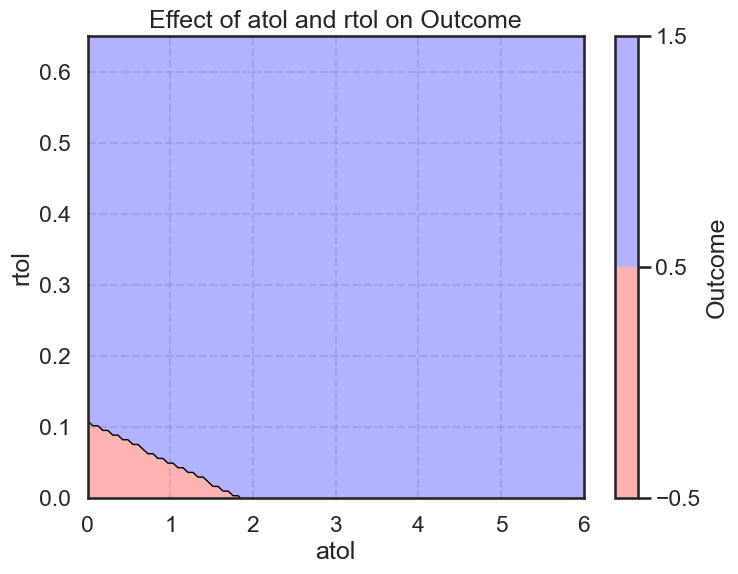

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define arrays to compare
a = np.array([4])
b = np.array([5])

# Define a range of atol and rtol values to test
atol_values = np.linspace(0, 6, 100)  # Varying from 0 to 1 linearly
rtol_values = np.linspace(0, .65, 100)  # Varying from 0 to 1 linearly

# Create a meshgrid of atol and rtol values
atol_mesh, rtol_mesh = np.meshgrid(atol_values, rtol_values)

# Initialize an array to store the results
results = np.zeros_like(atol_mesh)

# Iterate through each combination of atol and rtol
for i in range(len(atol_values)):
    for j in range(len(rtol_values)):
        # Compute the result using np.isclose with current atol and rtol
        results[i, j] = np.isclose(a, b, atol=atol_values[i], rtol=rtol_values[j]).all()

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.3)
plt.colorbar(label='Outcome')
plt.contour(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5], colors='k', linestyles='-', linewidths=1)
plt.xlabel('atol')
plt.ylabel('rtol')
plt.title('Effect of atol and rtol on Outcome')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


In [ ]:
list_of_objs[0].get_polarities()

array([2., 2., 0., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0.,
       0., 2., 0., 0., 2., 2., 2., 2., 2., 2.])

In [ ]:
roi_df.filter(items = ["contour_area_total", "colour"]).groupby("colour").describe().reindex(['R', 'G', 'B', 'UV'])

contour_area_total                                                      \
                    count        mean         std  min  25%      50%      75%   
colour                                                                          
R                   485.0  159.752089  166.527485  0.0  0.0  143.676  250.096   
G                   485.0  115.184019  148.808341  0.0  0.0    0.000  198.908   
B                   485.0   92.912903  124.020294  0.0  0.0    0.000  172.890   
UV                  485.0   69.439860  112.254040  0.0  0.0    0.000  133.464   

                 
            max  
colour           
R       969.876  
G       819.898  
B       633.930  
UV      643.612

In [ ]:
stat = "dom_centroids"
Rs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'R' & contour_area_total > 0")
Gs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'G' & contour_area_total > 0")
Bs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'B' & contour_area_total > 0")
Uvs = roi_df.filter(items =[f"{stat}", "contour_area_total", "colour"]).query("colour == 'UV' & contour_area_total > 0")
F, p = scipy.stats.f_oneway(Rs[f"{stat}"], Gs[f"{stat}"], Bs[f"{stat}"], Uvs[f"{stat}"])
print('%.08f' % p)

0.00000000


## Plot population stats by chromaticity

In [239]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  comple

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakpos_588,pol_375,pol_422,pol_478,pol_588,roi,spatial_X,spatial_Y,strf_obj,temporal_len
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_0,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0,200,95.0,True,-0.311245,...,0.650,0,0,-1,-1,0,24,40,<class 'pygor.classes.strf_data.STRF'>,4
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_1,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1,200,81.0,True,0.199129,...,0.585,0,0,0,-1,1,24,40,<class 'pygor.classes.strf_data.STRF'>,4
2,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_2,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2,200,81.0,True,-0.423248,...,0.520,0,0,-1,-1,2,24,40,<class 'pygor.classes.strf_data.STRF'>,4
3,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_3,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3,200,75.0,True,0.417496,...,0.130,0,0,0,-1,3,24,40,<class 'pygor.classes.strf_data.STRF'>,4
4,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_4,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4,200,43.0,False,4.685262,...,1.040,1,1,1,1,4,24,40,<class 'pygor.classes.strf_data.STRF'>,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_20,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,83.0,True,0.250045,...,0.390,0,-1,-1,0,20,24,40,<class 'pygor.classes.strf_data.STRF'>,4
481,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_21,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,61.0,False,-0.284578,...,1.235,0,0,0,0,21,24,40,<class 'pygor.classes.strf_data.STRF'>,4
482,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_22,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,84.0,False,0.296887,...,0.325,0,0,0,0,22,24,40,<class 'pygor.classes.strf_data.STRF'>,4
483,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_23,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,34.0,False,-0.398743,...,0.650,0,0,0,0,23,24,40,<class 'pygor.classes.strf_data.STRF'>,4


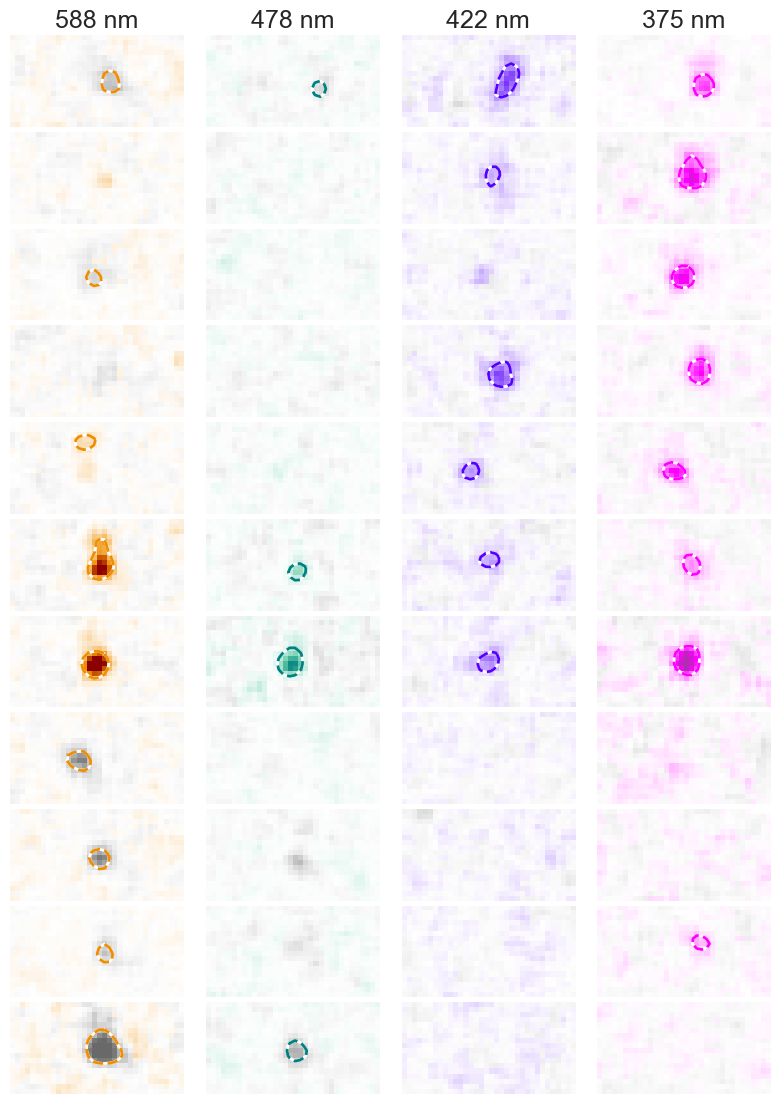

In [ ]:
list_of_objs[0].plot_chromatic_overview()

In [ ]:
list_of_objs[0].run_bootstrap('y')

Hang on, bootstrapping pygor.strf.temporal components 2500 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 1000 times:   0%|          | 0/44 [00:00<?, ?it/s]

14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

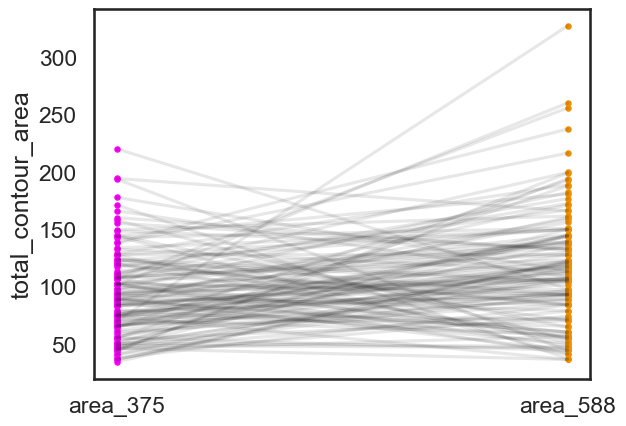

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

(0.0, 400.0)

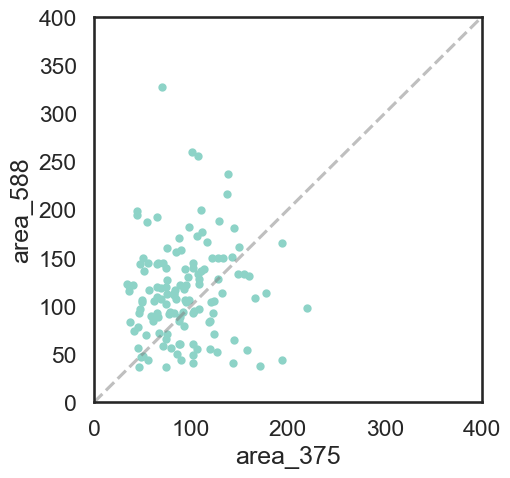

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 400)
plt.ylim(0, 400)


In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


[autoreload of pygor.strf.analyse failed: Traceback (most recent call last):
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\IPython\extensions\autoreload.py", line 459, in superreload
    module = reload(module)
  File "c:\Users\Simen\miniconda3\envs\strfclone\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py", line 322, in <module>
    def chromatic_stats(exp_obj : pygor.classes.experiment.Experiment) -> pd.DataFrame:
AttributeError: module 'pygor' has no attribute 'classes'
]


(10.0, 210.0)

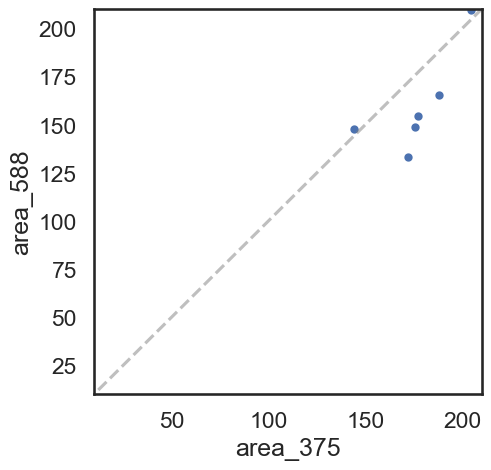

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(chroma_df["area_375"], chroma_df["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(10, 210)
plt.ylim(10, 210)


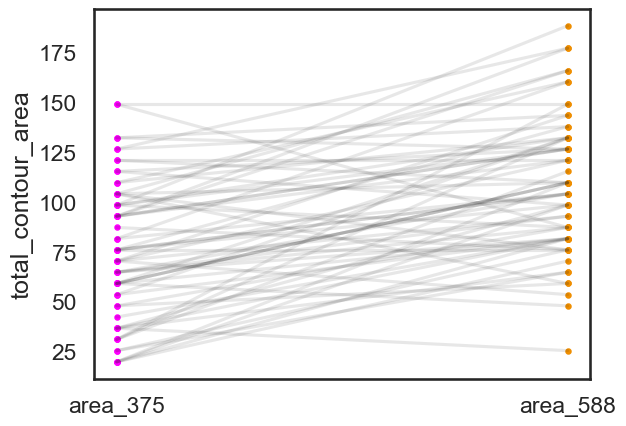

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

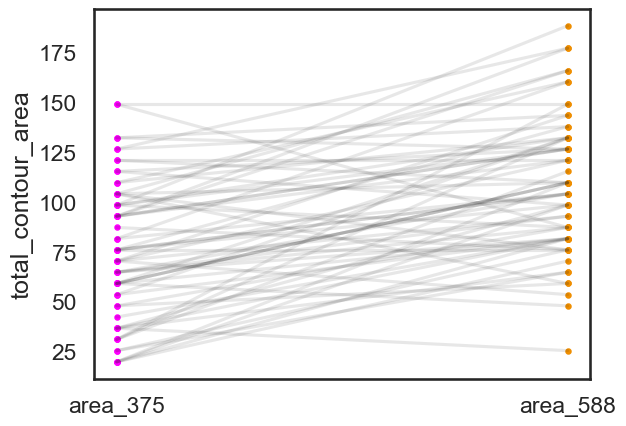

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
ruv_colour = [pygor.plotting.custom.fish_palette[-1], pygor.plotting.custom.fish_palette[0]]

<AxesSubplot: >

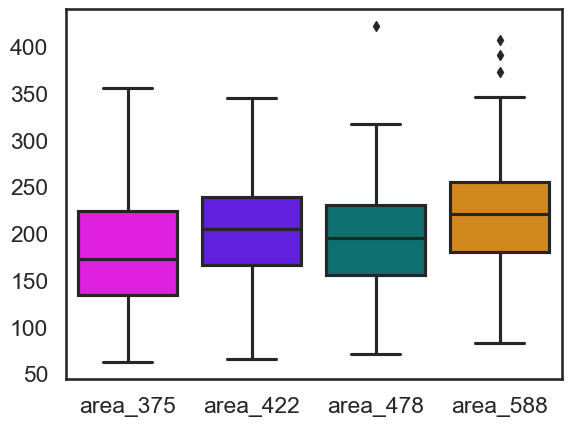

In [ ]:
sns.boxplot(data = chroma_df.filter(like = "area").query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1"), palette = reversed(pygor.plotting.fish_palette))

(0.0, 700.0)

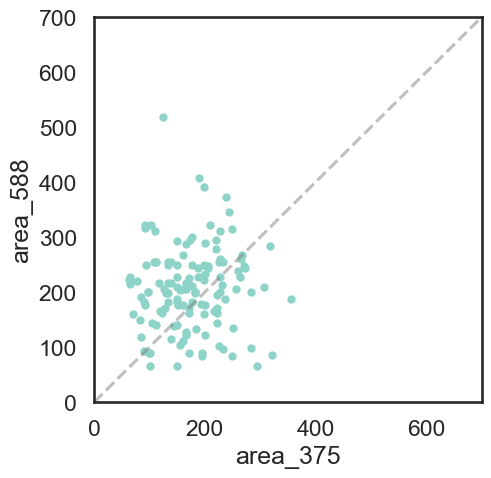

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 700)
plt.ylim(0, 700)


## Clustering on chromatic properties

In [5]:
import pygor.strf.clustering
import natsort
import warnings
import pygor.strf.clustering
# try:
#     chroma_df
# except NameError:
#     chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df = pygor.strf.analyse.chromatic_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  comple

In [357]:
chroma_df

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakpos_588,pol_375,pol_422,pol_478,pol_588,roi,spatial_X,spatial_Y,strf_obj,temporal_len
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_0,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0,200,95.0,True,-0.311245,...,0.650,0,0,-1,-1,0,24,40,<class 'pygor.classes.strf_data.STRF'>,4
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_1,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1,200,81.0,True,0.199129,...,0.585,0,0,0,-1,1,24,40,<class 'pygor.classes.strf_data.STRF'>,4
2,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_2,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2,200,81.0,True,-0.423248,...,0.520,0,0,-1,-1,2,24,40,<class 'pygor.classes.strf_data.STRF'>,4
3,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_3,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3,200,75.0,True,0.417496,...,0.130,0,0,0,-1,3,24,40,<class 'pygor.classes.strf_data.STRF'>,4
4,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_4,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4,200,43.0,False,4.685262,...,1.040,1,1,1,1,4,24,40,<class 'pygor.classes.strf_data.STRF'>,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_20,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,83.0,True,0.250045,...,0.390,0,-1,-1,0,20,24,40,<class 'pygor.classes.strf_data.STRF'>,4
481,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_21,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,61.0,False,-0.284578,...,1.235,0,0,0,0,21,24,40,<class 'pygor.classes.strf_data.STRF'>,4
482,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_22,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,84.0,False,0.296887,...,0.325,0,0,0,0,22,24,40,<class 'pygor.classes.strf_data.STRF'>,4
483,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_23,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,34.0,False,-0.398743,...,0.650,0,0,0,0,23,24,40,<class 'pygor.classes.strf_data.STRF'>,4


In [185]:
chroma_df.columns

Index(['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size',
       'ipl_depths', 'opp_bool', 'ampl_375', 'ampl_422', 'ampl_478',
       'ampl_588', 'area_375', 'area_422', 'area_478', 'area_588', 'cat_pol',
       'centdom_375', 'centdom_422', 'centdom_478', 'centdom_588',
       'centneg_375', 'centneg_422', 'centneg_478', 'centneg_588',
       'centpos_375', 'centpos_422', 'centpos_478', 'centpos_588', 'comp_375',
       'comp_422', 'comp_478', 'comp_588', 'peakneg_375', 'peakneg_422',
       'peakneg_478', 'peakneg_588', 'peakpos_375', 'peakpos_422',
       'peakpos_478', 'peakpos_588', 'pol_375', 'pol_422', 'pol_478',
       'pol_588', 'roi', 'spatial_375', 'spatial_422', 'spatial_478',
       'spatial_588', 'spatial_X', 'spatial_Y', 'strf_obj', 'temporal_375',
       'temporal_422', 'temporal_478', 'temporal_588', 'temporal_len'],
      dtype='object')

Automatic number determined as AIC = -1392.7687321955773 landing on covariance_type = full with  3 n_components
Automatic number determined as AIC = -7865.731923222549 landing on covariance_type = full with  7 n_components
Automatic number determined as AIC = -5227.944654425317 landing on covariance_type = full with  7 n_components
Automatic number determined as AIC = -2933.9809101421342 landing on covariance_type = full with  7 n_components


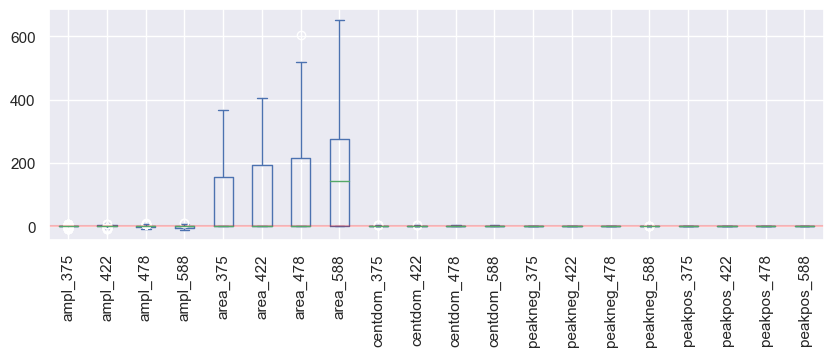

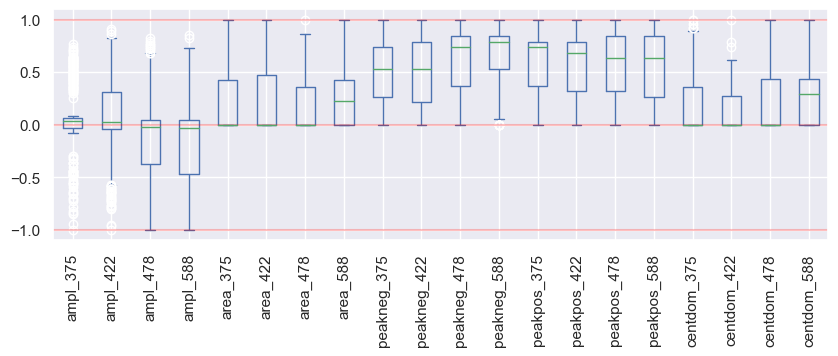

In [189]:
merged_pca_df, merged_stats_df, org_stats_df, pca_results = pygor.strf.clustering.run_clustering(chroma_df)

In [173]:
pd.unique(merged_pca_df["cat_pol"])

array(['mix', 'off', 'on', 'opp'], dtype=object)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)


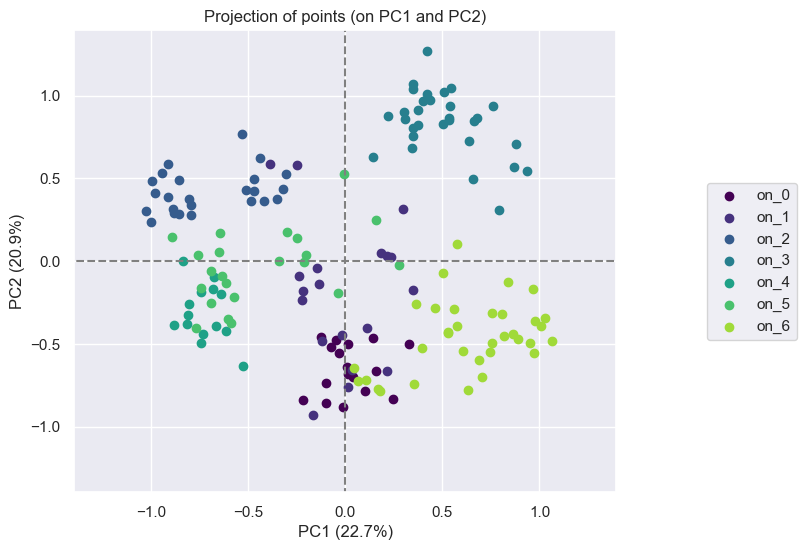

In [190]:
cat_pol = "on"
pygor.strf.clustering.plot.pc_project(merged_pca_df.query(f"cat_pol == '{cat_pol}'"), 
    pca_results[cat_pol], [(0, 1)])

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\plot.py:24: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(cmap, len(np.unique(labels)) + 1)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\clustering\p

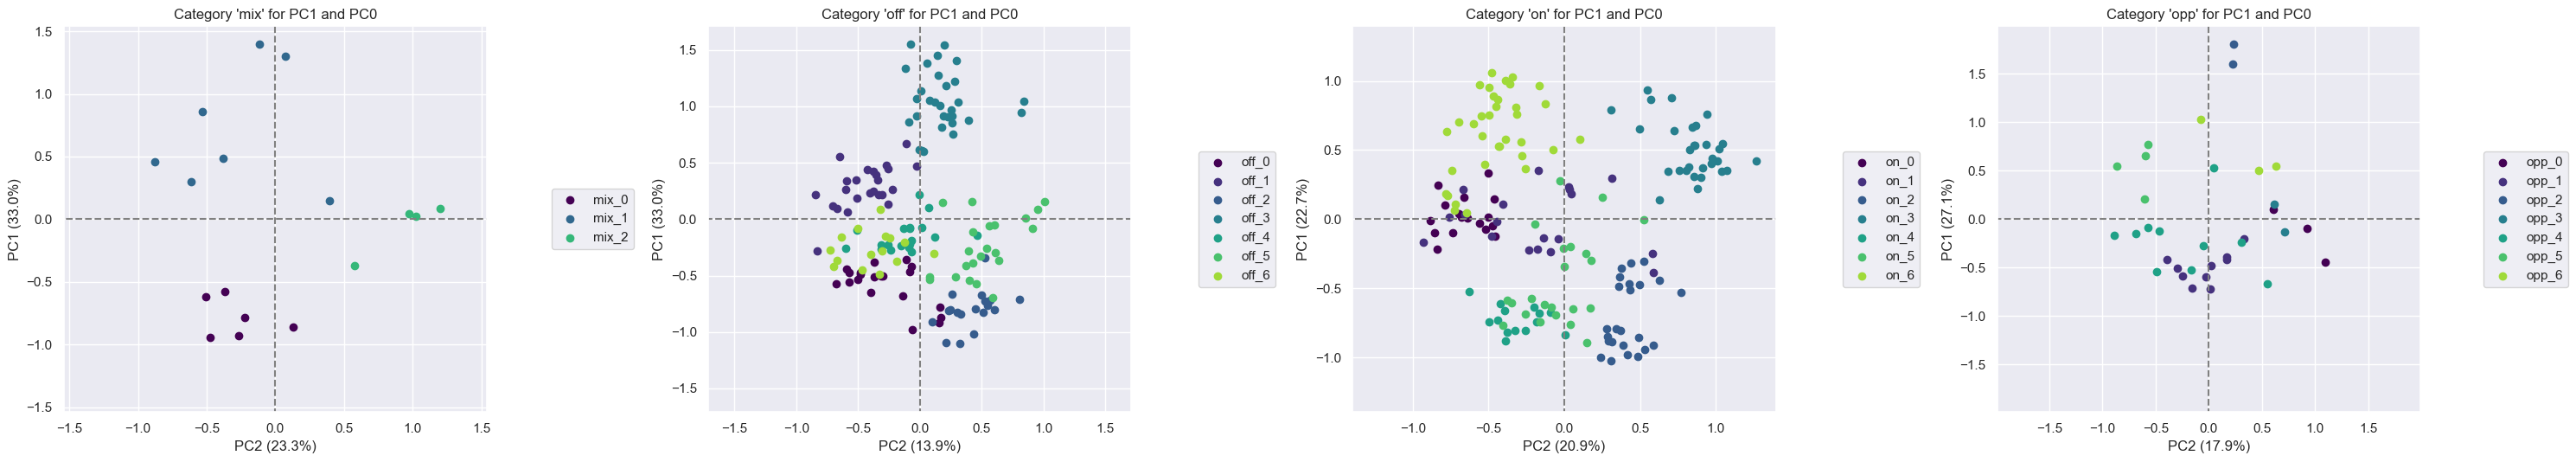

In [191]:
pygor.strf.clustering.plot.pc_summary(merged_pca_df, pca_results)

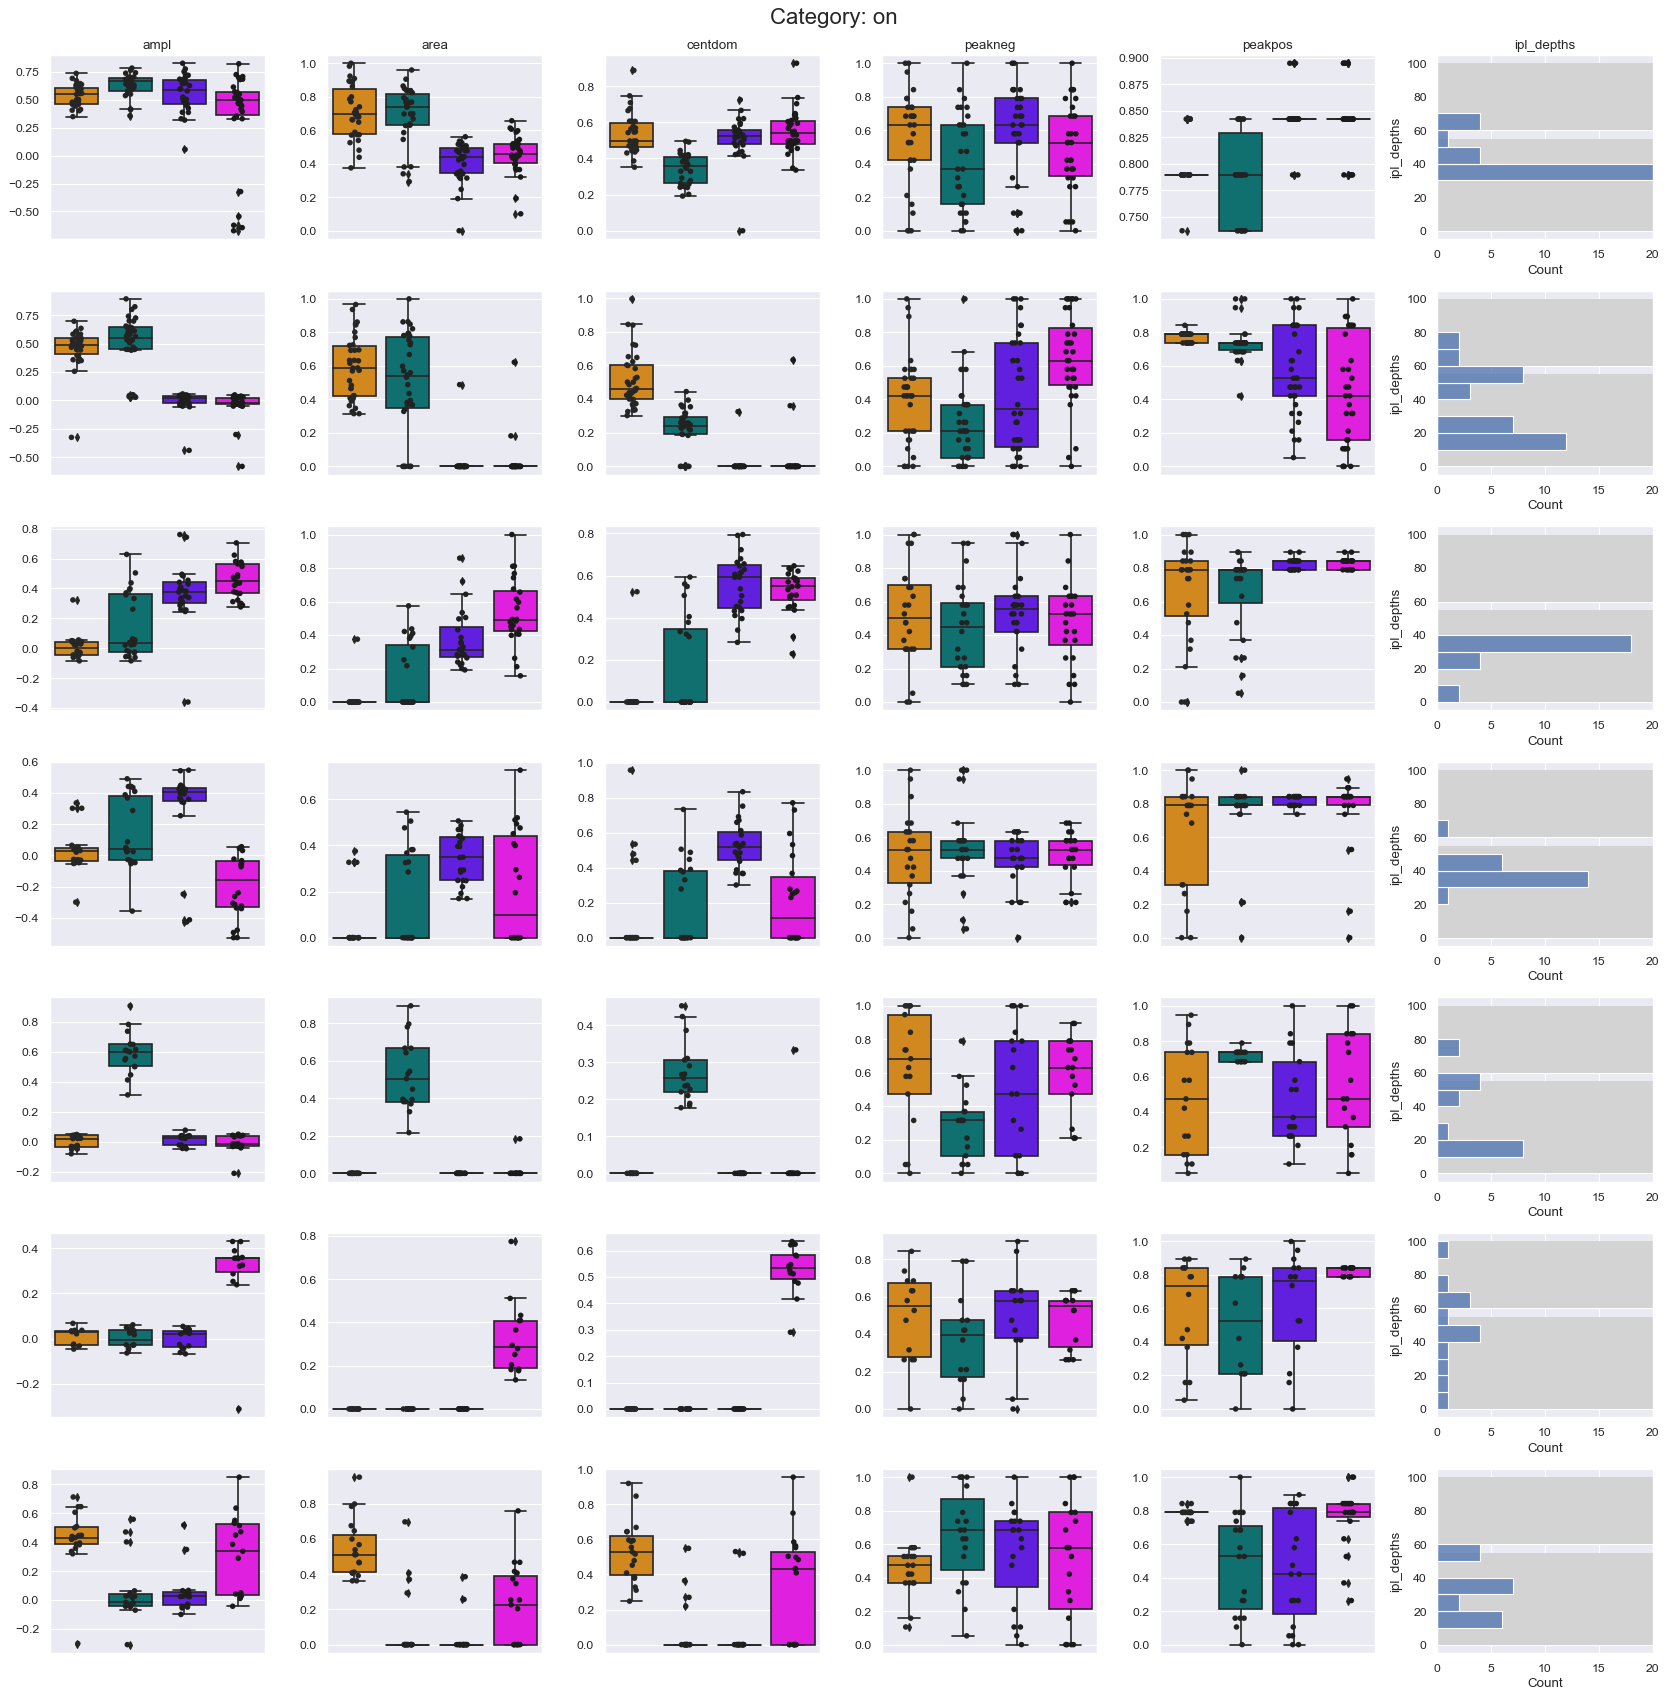

In [192]:
pygor.strf.clustering.plot.stats_summary(merged_stats_df, cat = "on", sharey=True)

In [248]:
avg_img = []
for roi, obj in org_stats_df.query("cluster_id == 'opp_1'")[["roi", "strf_obj"]].to_numpy():
    avg_img.append(obj.collapse_times(spatial_centre=True)[roi])


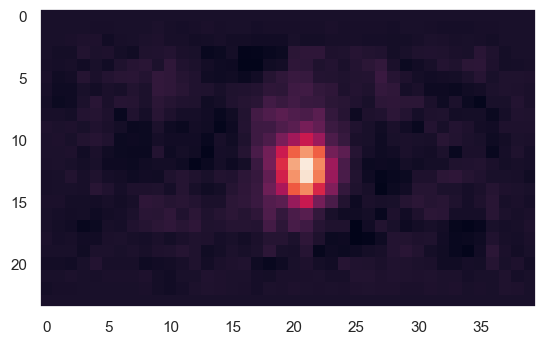

In [249]:
plt.imshow(np.average(avg_img, axis = 0))

In [228]:
merged_pca_df.query("cat_pol == 'mix'")

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,cluster,cat_pol
65,0.080221,0.346133,1.652014,-0.654616,0.035677,-0.078709,0.270813,-0.222140,-0.082341,0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,mix
66,0.469935,-0.857457,0.232873,-0.451369,-0.020184,0.166095,-0.161773,-0.071210,0.280584,0.074932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,mix
69,-0.694196,0.172977,-0.437018,-0.756973,0.185507,0.079490,0.073118,0.400643,-0.080763,0.051174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,mix
92,0.492868,1.352090,0.619589,-0.199029,-0.874859,-0.268375,-0.159113,0.085448,0.074472,-0.063345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,mix
100,0.287215,-0.981628,0.304367,0.117964,0.038915,-0.209045,-0.307999,-0.142178,-0.238178,-0.281627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,mix
118,0.753558,0.911606,0.839259,0.978911,0.373271,0.266079,-0.264094,0.214996,0.010000,0.007188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,mix
119,1.754429,-0.365496,-0.497538,0.360531,0.057178,-0.480091,0.593371,0.093223,0.122406,-0.069005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,mix
120,1.598502,-0.246200,-0.493605,0.076857,0.113045,0.002851,-0.174140,-0.090887,-0.246726,0.309861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,mix
131,0.665322,-1.051076,0.111466,-0.460598,0.076557,0.190982,-0.248652,0.163261,0.145274,-0.075773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,mix
242,-0.548164,-0.740887,0.286053,0.467722,-0.673307,0.691797,0.406744,0.016054,-0.101785,-0.015956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,mix


In [319]:
merged_pca_df.dropna(axis=1)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,cluster_id,cluster,cat_pol
65,0.080221,0.346133,1.652014,-0.654616,0.035677,-0.078709,0.270813,-0.222140,-0.082341,0.075195,-0.018070,0.014903,0.100153,0.047897,0.022888,0.009313,1.675294e-17,mix_5,9,mix
66,0.469935,-0.857457,0.232873,-0.451369,-0.020184,0.166095,-0.161773,-0.071210,0.280584,0.074932,-0.187558,0.110268,-0.064112,-0.010687,-0.044949,-0.010049,1.441031e-16,mix_13,5,mix
69,-0.694196,0.172977,-0.437018,-0.756973,0.185507,0.079490,0.073118,0.400643,-0.080763,0.051174,-0.148169,-0.069263,0.030472,-0.038780,0.039608,0.001494,-1.639433e-16,mix_9,13,mix
92,0.492868,1.352090,0.619589,-0.199029,-0.874859,-0.268375,-0.159113,0.085448,0.074472,-0.063345,0.058581,-0.048275,-0.066974,-0.058168,-0.026525,-0.000851,-1.393722e-16,mix_2,6,mix
100,0.287215,-0.981628,0.304367,0.117964,0.038915,-0.209045,-0.307999,-0.142178,-0.238178,-0.281627,-0.076791,-0.001805,-0.023415,-0.054119,0.049530,-0.005600,3.678510e-16,mix_3,7,mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-1.280763,0.162005,0.021747,-0.087612,-0.066348,0.175350,-0.559241,-0.082131,-0.454598,0.320430,-0.073568,-0.154716,0.062245,0.191111,-0.114233,0.055556,-4.916023e-03,opp_0,34,opp
320,-1.180041,-0.042483,0.243455,-0.321974,0.008790,-0.041019,-0.066434,-0.015769,-0.111619,0.034683,-0.030607,-0.008294,0.036676,0.046434,-0.024511,-0.112220,-3.139022e-02,opp_0,34,opp
341,-0.168429,1.387159,0.655373,0.037685,0.651292,-0.227734,0.110668,0.154633,0.015482,0.065358,-0.258542,0.328378,0.184230,-0.179916,-0.017644,0.071217,-1.001596e-01,opp_0,34,opp
345,-0.206916,1.307541,0.848343,-0.106465,0.875714,-0.128850,-0.145135,0.224575,0.153845,-0.361443,-0.014069,-0.322304,-0.125976,0.033101,-0.010000,0.035686,8.581361e-02,opp_0,34,opp


In [242]:
merged_pca_df.query(f"cat_pol == '{cat.split('_')[0]}'")

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,cluster,cat_pol
65,0.080221,0.346133,1.652014,-0.654616,0.035677,-0.078709,0.270813,-0.222140,-0.082341,0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,mix
66,0.469935,-0.857457,0.232873,-0.451369,-0.020184,0.166095,-0.161773,-0.071210,0.280584,0.074932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,mix
69,-0.694196,0.172977,-0.437018,-0.756973,0.185507,0.079490,0.073118,0.400643,-0.080763,0.051174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,mix
92,0.492868,1.352090,0.619589,-0.199029,-0.874859,-0.268375,-0.159113,0.085448,0.074472,-0.063345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,mix
100,0.287215,-0.981628,0.304367,0.117964,0.038915,-0.209045,-0.307999,-0.142178,-0.238178,-0.281627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,mix
118,0.753558,0.911606,0.839259,0.978911,0.373271,0.266079,-0.264094,0.214996,0.010000,0.007188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,mix
119,1.754429,-0.365496,-0.497538,0.360531,0.057178,-0.480091,0.593371,0.093223,0.122406,-0.069005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,mix
120,1.598502,-0.246200,-0.493605,0.076857,0.113045,0.002851,-0.174140,-0.090887,-0.246726,0.309861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,mix
131,0.665322,-1.051076,0.111466,-0.460598,0.076557,0.190982,-0.248652,0.163261,0.145274,-0.075773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,mix
242,-0.548164,-0.740887,0.286053,0.467722,-0.673307,0.691797,0.406744,0.016054,-0.101785,-0.015956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,mix


In [332]:
pca_results

{'empty': PCA(n_components=28),
 'mix': PCA(n_components=17),
 'off': PCA(n_components=28),
 'on': PCA(n_components=28),
 'opp': PCA(n_components=28)}

In [255]:
merged_pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,cluster,cat_pol
65,0.080221,0.346133,1.652014,-0.654616,0.035677,-0.078709,0.270813,-0.222140,-0.082341,0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,mix
66,0.469935,-0.857457,0.232873,-0.451369,-0.020184,0.166095,-0.161773,-0.071210,0.280584,0.074932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,mix
69,-0.694196,0.172977,-0.437018,-0.756973,0.185507,0.079490,0.073118,0.400643,-0.080763,0.051174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,mix
92,0.492868,1.352090,0.619589,-0.199029,-0.874859,-0.268375,-0.159113,0.085448,0.074472,-0.063345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,mix
100,0.287215,-0.981628,0.304367,0.117964,0.038915,-0.209045,-0.307999,-0.142178,-0.238178,-0.281627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,mix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-1.280763,0.162005,0.021747,-0.087612,-0.066348,0.175350,-0.559241,-0.082131,-0.454598,0.320430,...,-0.012603,-0.048594,-0.045463,-0.013076,0.012124,-0.004998,-0.001744,-0.000482,33,opp
320,-1.180041,-0.042483,0.243455,-0.321974,0.008790,-0.041019,-0.066434,-0.015769,-0.111619,0.034683,...,0.012990,-0.008270,0.050220,0.018481,-0.024030,-0.011134,-0.005600,0.001818,33,opp
341,-0.168429,1.387159,0.655373,0.037685,0.651292,-0.227734,0.110668,0.154633,0.015482,0.065358,...,-0.006326,0.075554,-0.013194,-0.018258,0.014899,-0.008175,0.000084,0.000204,33,opp
345,-0.206916,1.307541,0.848343,-0.106465,0.875714,-0.128850,-0.145135,0.224575,0.153845,-0.361443,...,-0.071971,-0.068960,-0.038326,0.008410,-0.002331,0.009075,-0.000534,-0.000010,33,opp


In [291]:
merged_pca_df.query("cat_pol == 'mix'").filter(like = "PC")

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
65,0.080221,0.346133,1.652014,-0.654616,0.035677,-0.078709,0.270813,-0.222140,-0.082341,0.075195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,0.469935,-0.857457,0.232873,-0.451369,-0.020184,0.166095,-0.161773,-0.071210,0.280584,0.074932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,-0.694196,0.172977,-0.437018,-0.756973,0.185507,0.079490,0.073118,0.400643,-0.080763,0.051174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.492868,1.352090,0.619589,-0.199029,-0.874859,-0.268375,-0.159113,0.085448,0.074472,-0.063345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.287215,-0.981628,0.304367,0.117964,0.038915,-0.209045,-0.307999,-0.142178,-0.238178,-0.281627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,0.753558,0.911606,0.839259,0.978911,0.373271,0.266079,-0.264094,0.214996,0.010000,0.007188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1.754429,-0.365496,-0.497538,0.360531,0.057178,-0.480091,0.593371,0.093223,0.122406,-0.069005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1.598502,-0.246200,-0.493605,0.076857,0.113045,0.002851,-0.174140,-0.090887,-0.246726,0.309861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,0.665322,-1.051076,0.111466,-0.460598,0.076557,0.190982,-0.248652,0.163261,0.145274,-0.075773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,-0.548164,-0.740887,0.286053,0.467722,-0.673307,0.691797,0.406744,0.016054,-0.101785,-0.015956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(-2.0, 2.0)

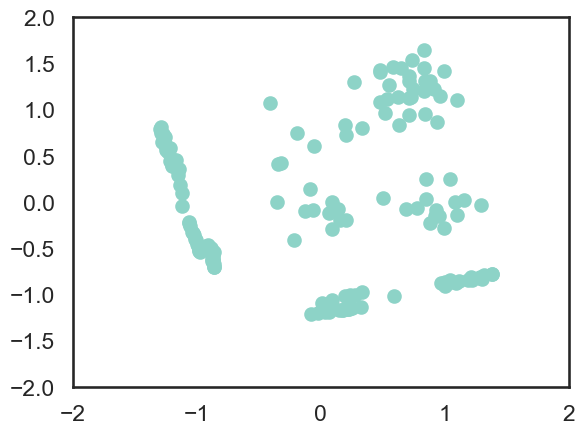

In [331]:
arr = merged_pca_df.query("cat_pol == 'on'").filter(like = "PC").to_numpy()
x = arr[:, 0]
y = arr[:, 1]
plt.scatter(x, y)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [84]:
cluster_ids = natsort.natsorted(stats_df["cluster_id"].unique())
scale = 2
fig, ax = plt.subplots(len(cluster_ids), 9, figsize = (10*scale, len(cluster_ids)*scale/1.25) , sharex=False, sharey=False)
for n, clust in enumerate(cluster_ids):
    # Prep for plotting
    Rarrs = []
    Garrs = []
    Barrs = []
    UVarrs = []
    Rtimes = []
    Gtimes = []
    Btimes = []
    UVtimes = []
    ipls = []
    # Get the files and rois
    files = []
    rois = []
    # Loop through matches in the cluster, per ROI (iloc)
    for df in stats_df.query(f"cluster_id == '{clust}'").iloc:
        Rarrs.append(df["spatial_588"])
        Garrs.append(df["spatial_478"])
        Barrs.append(df["spatial_422"])
        UVarrs.append(df["spatial_375"])
        Rtimes.append(df["temporal_588"])
        Gtimes.append(df["temporal_478"])
        Btimes.append(df["temporal_422"])
        UVtimes.append(df["temporal_375"])
        files.append(df["curr_path"])
        rois.append(df["roi"])
        ipls.append(df["ipl_depths"])

    func = np.nanmean
    # Space plots
    R_arrs = np.nan_to_num(np.array(Rarrs).astype('float16'))
    G_arrs = np.nan_to_num(np.array(Garrs).astype('float16'))
    B_arrs = np.nan_to_num(np.array(Barrs).astype('float16'))
    UV_arrs = np.nan_to_num(np.array(UVarrs).astype('float16'))
    r = ax[n, 0].imshow(func(R_arrs, axis = 0), origin = "lower", cmap = pygor.plotting.red_map)
    g = ax[n, 1].imshow(func(G_arrs, axis = 0), origin = "lower", cmap = pygor.plotting.green_map)
    b = ax[n, 2].imshow(func(B_arrs, axis = 0), origin = "lower", cmap =  pygor.plotting.blue_map)
    u = ax[n, 3].imshow(func(UV_arrs, axis = 0), origin = "lower", cmap = pygor.plotting.violet_map)
    for m in range(4):
        ax[n, m].set_yticks([])
        ax[n, m].set_xticks([])
        ax[n, m].spines[["bottom", "left"]].set_visible(False)
    for i in [r, g, b, u]:
        i.set_clim(-5, 5)
    # Time plots
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        R_times = func(np.array([np.array(i).astype('float16') for i in Rtimes]), axis=0,).T
        G_times = func(np.array([np.array(i).astype('float16') for i in Gtimes]), axis=0).T
        B_times = func(np.array([np.array(i).astype('float16') for i in Btimes]), axis=0).T
        UV_times = func(np.array([np.array(i).astype('float16') for i in UVtimes]), axis=0).T
        times_to_plot = [R_times, G_times, B_times, UV_times]
        colours_to_plot = ["r", "g", "b", "m"]
        for i in range(4,8):
            time = times_to_plot[i-4]
            ax[n, i].axhline(0, c = "lightgrey", ls = "--")
            ax[n, i].plot(time[:, 1], c = pygor.plotting.fish_palette[i-4])
            ax[n, i].plot(time[:, 0], c = "darkgrey")
            #ax[n, i].set_xticks([])
            if i != 4:
                ax[n, i].set_yticks([])
            max_val = np.nanmax(np.abs(np.nan_to_num(times_to_plot)))
            ax[n, i].set_ylim(ymin=-max_val, ymax=max_val)
    # IPL plot
    ax[n, -1].axhspan(0, 50, color = "lightgrey", alpha = 0.5)
    ax[n, -1].axhspan(60, 100, color = "lightgrey", alpha = 0.5)
    sns.histplot(data = stats_df.query(f"cluster_id == '{clust}'"), y = "ipl_depths", binrange = (0, 100), binwidth = 10, ax = ax[n, -1])
    ax[n, -1].set_xlabel("")
    ax[n, -1].set_xlim(0, 15)
    #ax[n, -1].set_yticks([])
    #ax[n, -1].set_xticks([])    # General plotting    
    ax[n, 0].set_ylabel(f"{clust}", rotation = 0, size = 12, labelpad = 30)
    ax[n, -1].set_ylabel(f"n = {len(files)}", rotation = 0, size = 12, labelpad = 30)
    ax[n, -1].yaxis.set_label_position("right")
    
fig.tight_layout(w_pad=0, h_pad=1)

KeyError: 'spatial_588'

Error in callback <function _draw_all_if_interactive at 0x00000213B95805E0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000213B956FBE0> (for post_execute):


KeyboardInterrupt: 